#Importing Libraries for Logistic Regression and Model Evaluation

Short Details

pandas, numpy: Data handling & numerical operations

LogisticRegression: For building classification models

train_test_split: Splitting dataset into training/testing sets

sklearn.metrics: Evaluation metrics (accuracy, precision, recall, F1, ROC, etc.)

matplotlib, seaborn, plotly: Data visualization (static + interactive plots)

warnings: To ignore unnecessary warning messages

👉 This setup covers data preprocessing, model training, evaluation, and visualization in one place. ✅

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix,recall_score,roc_auc_score,roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

##Upload file and read csv

In [ ]:
file_name="/content/Social_Network_Ads.csv"
df=pd.read_csv(file_name)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,NaN,0.0
1,15810944,NaN,35,20000.0,0.0
2,15668575,Female,26,43000.0,NaN
3,15603246,NaN,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           398 non-null    object 
 2   Age              400 non-null    int64  
 3   EstimatedSalary  399 non-null    float64
 4   Purchased        399 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,399.000000,399.000000
mean,1.569154e+07,37.655000,69869.674185,0.358396
std,7.165832e+04,10.482877,34044.650812,0.480131
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
px.scatter(df,x="EstimatedSalary",y="Age",title="EstimatedSalary vs Age")

#drop irrevalant features

In [ ]:
df_clean=df.drop(columns="User ID")
df.isnull().sum()

,0
User ID,0
Gender,2
Age,0
EstimatedSalary,1
Purchased,1


#Label Encoding Gender Column

Short Detail

The LabelEncoder converts the categorical values in the Gender column (e.g., Male/Female) into numeric values (0, 1, …). This makes the data suitable for machine learning models. ✅

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
label=LabelEncoder()
df_clean["Gender"]=label.fit_transform(df_clean["Gender"])
print(df_clean.head())

   Gender  Age  EstimatedSalary  Purchased
0       1   19              NaN        0.0
1       2   35          20000.0        0.0
2       0   26          43000.0        NaN
3       2   27          57000.0        0.0
4       1   19          76000.0        0.0


#Scatter Plot: Age vs Estimated Salary

Detail

A scatter plot is used to visualize the relationship between two continuous variables and to detect patterns, clusters, or outliers in the data.

X-axis: Age

Y-axis: Estimated Salary

Color: Purchase status (whether the customer purchased or not)

Symbol: Gender

This helps in analyzing how age and salary influence purchase behavior across different genders. ✅

In [ ]:
px.scatter(df_clean,
           x="Age",
           y='EstimatedSalary',
           title="Age vs 'EstimatedSalary'",
           color="Purchased",
           symbol="Gender",
           )

#Histogram: Age Distribution by Purchase Status

Detail

A histogram is used to visualize the frequency distribution of a continuous variable.

X-axis: Age

Color: Purchase status (Purchased vs. Not Purchased)

Barmode = overlay: Allows comparison of purchase behavior across different age groups in the same plot.

In [ ]:
px.histogram(df_clean,x="Age",y="EstimatedSalary",color="Purchased",title="Age vs EstimatedSalary",barmode="overlay")

#Box Plot: Age vs Purchase Status

Detail

A box plot is useful for understanding the distribution of data, showing the median, quartiles, and outliers.

X-axis: Purchase status (Purchased vs. Not Purchased)

Y-axis: Age

Color: Purchase status for clear grouping

This plot helps compare the age distribution of customers who purchased versus those who did not. ✅

In [ ]:
px.box(df_clean,
       x="Purchased",y="Age",color="Purchased",title="Age vs EstimatedSalary")

#Violin Plot: Age Distribution by Purchase Status

Detail

A violin plot combines a box plot with a kernel density estimate, making it easier to see both the distribution shape and statistical summary of the data.

X-axis: Purchase status (Purchased vs. Not Purchased)

Y-axis: Age

Color: Purchase status for grouping

box=True: Displays the box plot inside the violin

points="all": Shows all individual data points

This visualization helps analyze how age is distributed among purchasers and non-purchasers, while also displaying outliers and density. ✅

In [ ]:
px.violin(
    df_clean,x="Purchased",y="Age",color="Purchased",title="Age vs EstimatedSalary",box=True,points="all"
)

#Parallel Coordinates Plot: Multivariate Analysis by Purchase Status

Detail

A parallel coordinates plot is used to visualize patterns across multiple features simultaneously. Each line represents one observation, and the color distinguishes between purchase outcomes.

Features shown: Gender, Age (and can include more variables)

Color: Purchase status (Purchased vs. Not Purchased)

Use case: Helps detect trends, correlations, and group differences across multiple dimensions. ✅

In [ ]:
px.parallel_coordinates(
    df_clean,
    color="Purchased",
    title="Parallel coordinates plot",
    labels={
        "Gender":"Gender",
        "Age":"Age",

    }
)

#Correlation Heatmap: Relationships Between Features

Detail

A correlation heatmap is used to visualize the strength and direction of relationships between numerical variables.

Method: df.corr() computes pairwise correlation values.

Visualization: px.imshow() displays the correlation matrix with annotated values (text_auto=True).

Title Update: Instead of "Estimates vs Age", use "Correlation Heatmap of Features" for accuracy.

This helps identify which features (e.g., Age, Estimated Salary, Purchased) are strongly related, guiding feature selection for modeling. ✅

In [ ]:
corr=df_clean.corr()
fig=px.imshow(corr,text_auto=True,title="Estimates vs Age")
fig.show()

In [ ]:
df.fillna(df.median(numeric_only = True), inplace = True)

# Filling missing Object values
for col in df.select_dtypes(include = ['object']):
    df[col].fillna(df[col].mode()[0], inplace = True)

df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,70000.0,0.0
1,15810944,Female,35,20000.0,0.0
2,15668575,Female,26,43000.0,0.0
3,15603246,Female,27,57000.0,0.0
4,15804002,Male,19,76000.0,0.0


In [ ]:
df_clean = df_clean.dropna()
df_clean["Purchased"] = df_clean["Purchased"].fillna(0)
print("successfull")

successfull


#Splitting Dataset into Training and Testing Sets

Detail

The dataset is divided into:

X: Features (all columns except Purchased)

y: Target variable (Purchased)

train_test_split(): Splits the data into 80% training and 20% testing using a fixed random state for reproducibility.

This ensures the model can be trained on one part of the data and evaluated on unseen data. ✅

In [ ]:
X=df_clean.drop("Purchased",axis=1)
y=df_clean["Purchased"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("successfully split")

successfully split



#Training Logistic Regression Model

Detail

A Logistic Regression model is created and trained on the training dataset.

model = LogisticRegression(): Initializes the model.

model.fit(X_train, y_train): Learns patterns between the features (X_train) and the target (y_train).

This step builds the classification model that will later be used for predictions and evaluation. ✅

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

#Making Predictions with Logistic Regression Model

Detail

y_pred = model.predict(X_test): Uses the trained model to predict outcomes on the unseen test dataset.

The predictions (y_pred) represent the model’s classification results for the target variable (Purchased).

This step helps compare predicted values with actual values to evaluate model performance. ✅

In [ ]:
y_pred=model.predict(X_test)
print(f"y prediction{y_pred}")

y prediction[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0.]


#Model Evaluation Metrics

Detail

The logistic regression model is evaluated using:

Accuracy Score → Overall correctness of predictions

Precision Score → Correct positive predictions out of all predicted positives

Recall Score → Correct positive predictions out of actual positives

Confusion Matrix → Shows true vs. predicted classifications

This helps measure how well the model performs on test data. ✅

In [ ]:
print(f"accuracy_score={accuracy_score(y_test,y_pred)}")
print(f"precision_score={precision_score(y_test,y_pred)}")
print(f'recall_score={recall_score(y_test,y_pred)}')
print(f"confusion_matric={confusion_matrix(y_test,y_pred)}")

accuracy_score=0.8625
precision_score=0.9473684210526315
recall_score=0.6428571428571429
confusion_matric=[[51  1]
 [10 18]]


#Advanced Model Evaluation: F1-Score and ROC-AUC

Detail

F1-Score: Harmonic mean of precision and recall, useful when classes are imbalanced.

ROC-AUC: Measures the model’s ability to distinguish between classes (higher is better).

These metrics give a deeper understanding of model performance beyond accuracy. ✅

In [ ]:
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
print(f"fi_score={f1:.2f}")
print(f"roc_auc={roc_auc:.2f}")

fi_score=0.77
roc_auc=0.81


#ROC Curve: Model Performance Visualization

Detail

The ROC Curve (Receiver Operating Characteristic) shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds.

fpr, tpr: Computed using roc_curve()

AUC (Area Under Curve): Summarizes the model’s ability to distinguish classes (closer to 1 = better)

The diagonal line represents random guessing for comparison.

This plot visually evaluates how well the logistic regression model separates positive and negative classes. ✅

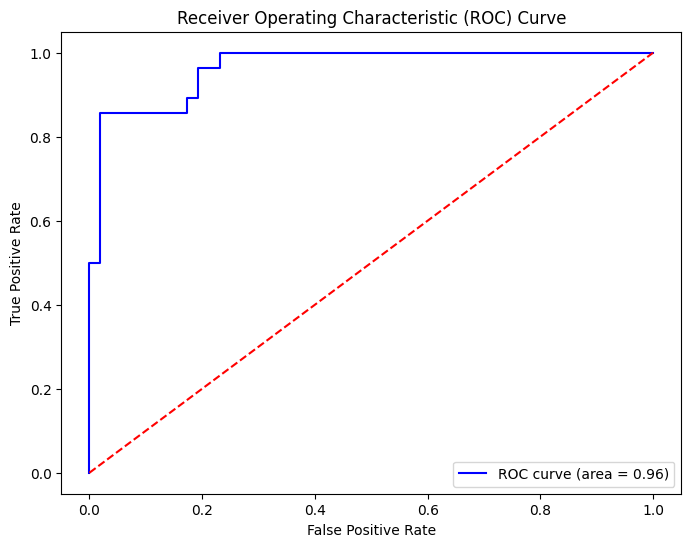

In [ ]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


#Making Predictions on New Scaled Data

Detail

A new DataFrame (new_data) is created with features Gender, Age, EstimatedSalary (already scaled).

The trained Logistic Regression model predicts purchase outcomes using model.predict(new_data).

Predictions (pred) indicate whether each new entry is classified as Purchased (1) or Not Purchased (0). ✅

In [ ]:
new_data=pd.DataFrame({
    "Gender":[1, 0, 1, 0, 1],
     'Age': [-0.5, 0.2, 1.1, -1.3, 0.7],              # Scaled
    'EstimatedSalary': [-1.0, 0.3, 1.2, -0.8, 0.9]
})
pred=model.predict(new_data)
print(f"prediction{pred}")
print(new_data)

prediction[0. 0. 0. 0. 0.]
   Gender  Age  EstimatedSalary
0       1 -0.5             -1.0
1       0  0.2              0.3
2       1  1.1              1.2
3       0 -1.3             -0.8
4       1  0.7              0.9


In [114]:
fig=px.violin(df,x="EstimatedSalary",y="Purchased",points="all",box=True,title="Estimated vs purchased")
fig.show()

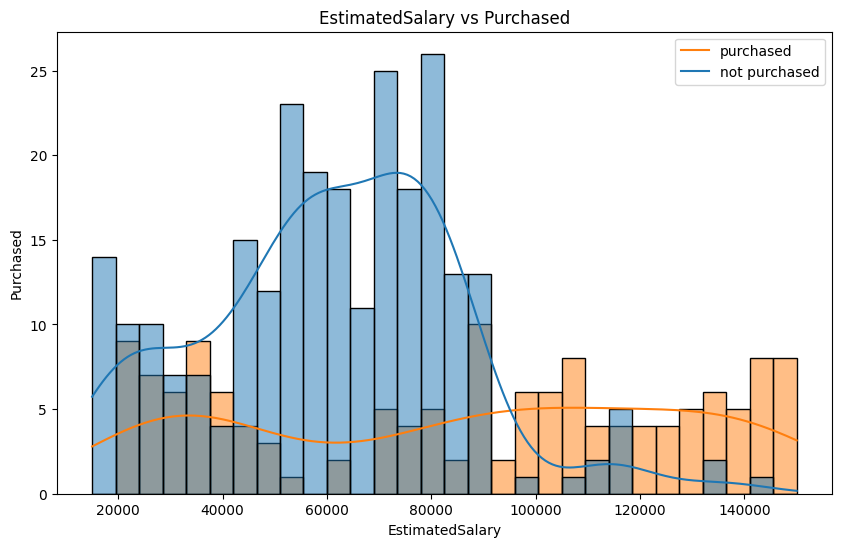

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(x="EstimatedSalary",hue="Purchased",data=df,kde=True,bins=30)
plt.title("EstimatedSalary vs Purchased")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.legend(labels=["purchased","not purchased"])
plt.show()

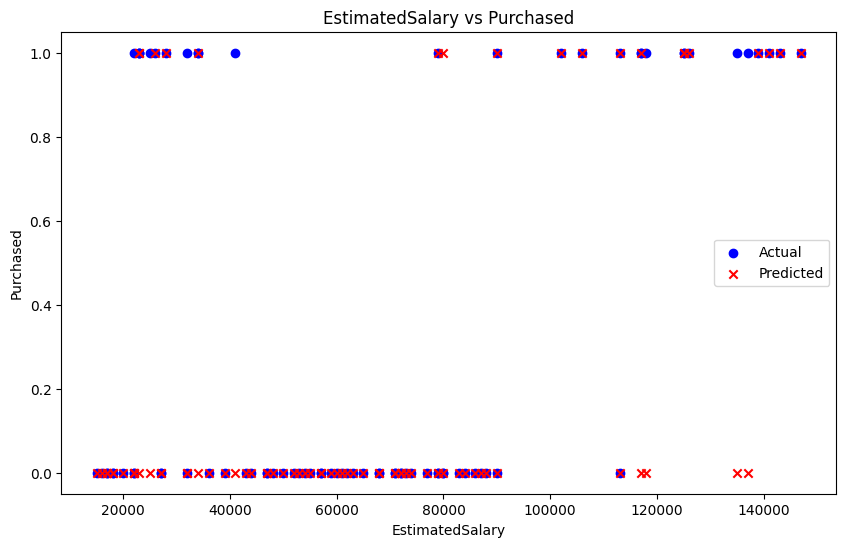

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(X_test["EstimatedSalary"], y_test, color="blue", label="Actual")
plt.scatter(X_test["EstimatedSalary"], y_pred, color="red", marker="x", label="Predicted")

plt.title("EstimatedSalary vs Purchased")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.legend()
plt.show()

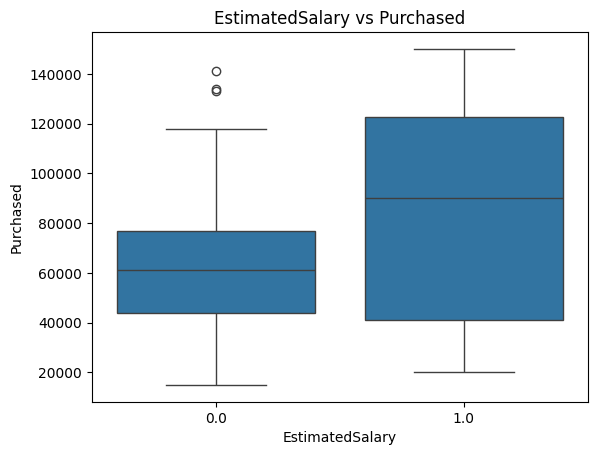

In [117]:
sns.boxplot(x="Purchased", y="EstimatedSalary", data=df)
plt.title("EstimatedSalary vs Purchased")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.show()